In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from IPython.display import Image

In [47]:
heartdata = pd.read_csv("heart_2020_cleaned.csv")
heartdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [53]:
heartdata =  heartdata[heartdata.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'Fair':0, 'Poor':0, 
                                                  'Excellent':3,'Good':1, 'Very good':2,'18-24':18,'25-29':25,
                                                  '30-34':30, '35-39':35, '40-44':40, '45-49':45, 
                                                  '50-54':50, '55-59':55, '60-64':60, '65-69':65, 
                                                  '70-74':70, '75-79':75, '80 or older':80, 
                                                  'No, borderline diabetes':0, 'Yes(during pregnancy)':1,
                                                  'Yes (during pregnancy)':1})

In [49]:
heartdata = heartdata.drop('Race', axis=1)

In [54]:
heartdata

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,2,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,0,1,2,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,1,1,0,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,0,0,1,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,0,1,2,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,1,0,0,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,0,1,2,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,0,1,1,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,0,0,1,12.0,0,0,0


In [62]:
heartdata = heartdata.fillna(0)

In [63]:
print(heartdata.dtypes)

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object


In [64]:
heartdata.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,52.440945,0.135590,0.775362,1.630329,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,18.069747,0.342353,0.417344,0.968772,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,55.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,65.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,80.000000,1.000000,1.000000,3.000000,24.000000,1.000000,1.000000,1.000000


In [78]:
print(heartdata['HeartDisease'].value_counts())

0    292422
1     27373
Name: HeartDisease, dtype: int64


In [94]:
# Create the target variable, y
target = heartdata["HeartDisease"]
target_names = ["Yes", "No"]

In [95]:
# Get the features
data = heartdata.drop("HeartDisease", axis=1)
feauture_names = data.columns
data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,2,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,80,0,1,2,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,65,1,1,0,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,75,0,0,1,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,40,0,1,2,8.0,0,0,0


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, heartdata["HeartDisease"], random_state=1)

In [104]:
X_train.shape

(239846, 16)

In [105]:
X_test.shape

(79949, 16)

In [106]:
y_train.shape

(239846,)

In [107]:
y_test.shape

(79949,)

In [10]:
#Checking correlation between datapoints
print(heartdata.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease        1.000000
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
KidneyDisease       0.145197
Smoking             0.107764
PhysicalActivity    0.100030
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
AlcoholDrinking     0.032080
MentalHealth        0.028591
SleepTime           0.008327
Name: HeartDisease, dtype: float64


In [110]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [111]:
y_pred_lr.shape

(79949,)

In [112]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 91.55 %


In [113]:
#decision tree model
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [114]:
print(y_pred_dt.shape)

(79949,)


In [115]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 86.55 %


In [117]:
#K nearest neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [118]:
Y_pred_knn.shape

(79949,)

In [119]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 91.01 %


In [120]:
#random forest model
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [121]:
Y_pred_rf.shape

(79949,)

In [122]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.58 %


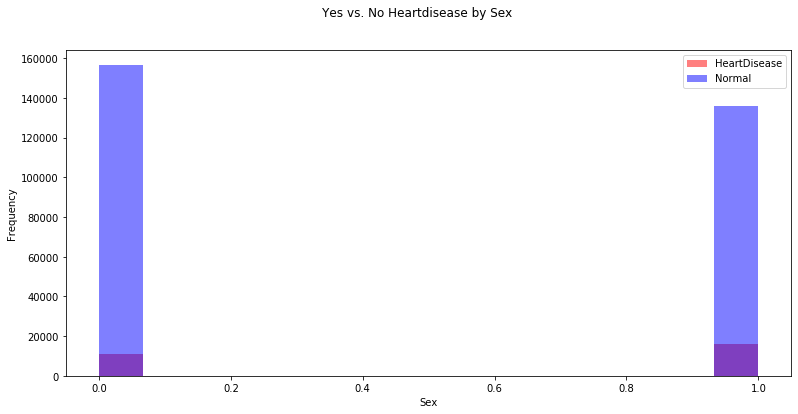

In [131]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(heartdata[heartdata["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(heartdata[heartdata["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="blue", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Yes vs. No Heartdisease by Sex")

ax.legend();

In [132]:
#malesex = 1
#femalesex = 0

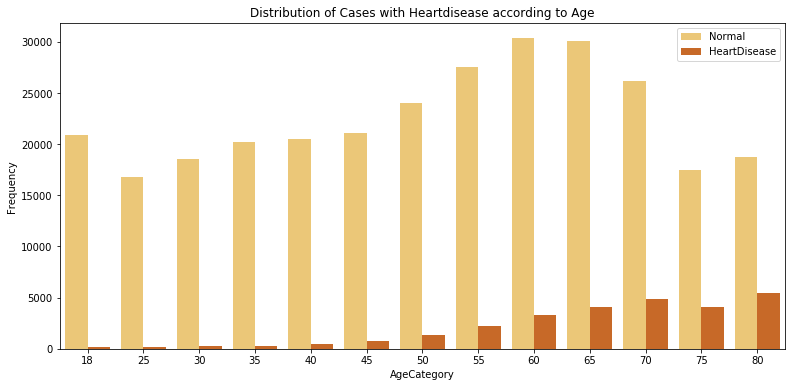

In [136]:
plt.figure(figsize = (13,6))
sns.countplot(x = heartdata['AgeCategory'], hue = 'HeartDisease', data = heartdata, palette = 'YlOrBr')
plt.title("Distribution of Cases with Heartdisease according to Age")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

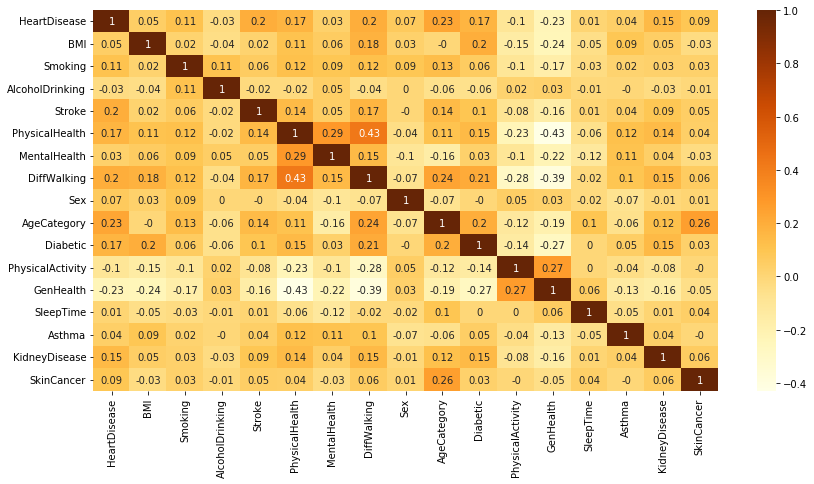

In [137]:
correlation = heartdata.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')